Création d'un monde avec des nourritures notés 2. La probabilité qu'il y a une nourriture et la taille du monde sont spécifiés.

In [2]:
import numpy as np
import random as random

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
chance_food = 0.50
taille_monde = 10

def create_world(chance_food, taille):
    """Initialize the world grid with random food placement and initial territories."""
    world = np.zeros((taille, taille), dtype=int)  # Start with an empty world
    for i in range(taille):
        for j in range(taille):
            if np.random.rand() < chance_food:
                world[i, j] = 2  # Place food
            elif np.random.rand() < 0.1:  # Adjust this probability to control the density of initial territories
                world[i, j] = np.random.choice([1, 3])  # Randomly assign red or blue territory
    return world

In [10]:
ab = create_world(chance_food,taille_monde)
ab

array([[2, 0, 0, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 2, 2, 2, 0, 0, 2, 0],
       [2, 2, 0, 2, 2, 2, 2, 0, 2, 0],
       [2, 0, 2, 2, 0, 2, 0, 2, 0, 2],
       [0, 3, 0, 2, 2, 0, 2, 0, 0, 2],
       [0, 2, 0, 2, 2, 2, 0, 0, 2, 0],
       [0, 0, 0, 0, 2, 2, 0, 2, 2, 0],
       [0, 2, 0, 0, 1, 0, 2, 2, 0, 2],
       [0, 2, 0, 2, 0, 0, 0, 2, 0, 2],
       [0, 2, 0, 2, 2, 2, 0, 0, 2, 2]])

On écrit un code qui compte le nombre de nourriture dans une monde.

In [3]:
def num_food(world):
    """Count the amount of food in the world."""
    return np.count_nonzero(world == 2)

In [16]:
num_food(ab)

51

In [4]:
def update_world(world, day):
    """Occasionally increase food in the world."""
    if day % 10 == 0:
        new_food_positions = np.random.choice([0, 2], size=world.shape, p=[0.9, 0.1])
        world = np.maximum(world, new_food_positions)
    return world

In [5]:
def expand_territory(world, red, blue):
    """Attempt to expand the territory of red and blue populations."""
    new_world = world.copy()
    for i in range(world.shape[0]):
        for j in range(world.shape[1]):
            if world[i, j] == 0:  # Only expand into empty spaces
                neighbors = [(i+x, j+y) for x, y in [(-1, 0), (1, 0), (0, -1), (0, 1)] if 0 <= i+x < world.shape[0] and 0 <= j+y < world.shape[1]]
                red_neighbors = sum(world[nx, ny] == 1 for nx, ny in neighbors)
                blue_neighbors = sum(world[nx, ny] == 3 for nx, ny in neighbors)
                if red_neighbors > 0 and blue_neighbors > 0:
                    new_world[i, j] = 4  # Mixed territory
                elif red_neighbors > 0:
                    new_world[i, j] = 1
                elif blue_neighbors > 0:
                    new_world[i, j] = 3
    return new_world, red, blue


In [6]:
def plot_world(world, day):
    """Plot the world grid with distinct colors for red and blue."""
    cmap = ListedColormap(['white', 'red', 'green', 'blue', 'purple'])  # white: empty, red: red territory, green: food, blue: blue territory, purple: contested (mixed)
    plt.figure(figsize=(8, 8))
    plt.imshow(world, cmap=cmap)
    plt.title(f"Day {day}")
    plt.show()

On écrit un code qui calcule le nombre des predateurs (rouge) et le nombre des proies en sachant le nombre initiale de nouritures, predateurs et proies.

In [7]:
def red_blue_random(red, blue, food):
    """Simulates a day of red and blue populations competing for food."""
    if food == 0:
        return red, blue  # No food to compete for

    red_food = int(food * (red / (red + blue + 1)))  # Avoid division by zero
    blue_food = food - red_food

    red += red_food
    blue += blue_food
    return red, blue

In [8]:
def run_simulation(days):
    """Run the simulation over a specified number of days."""
    world = create_world(chance_food, taille_monde)
    red, blue = 30, 30  # Starting populations
    for day in range(1, days + 1):
        world = update_world(world, day)
        world, red, blue = expand_territory(world, red, blue)
        plot_world(world, day)
        red, blue = red_blue_random(red, blue, num_food(world))
        print(f"Day {day}: Red: {red}, Blue: {blue}")

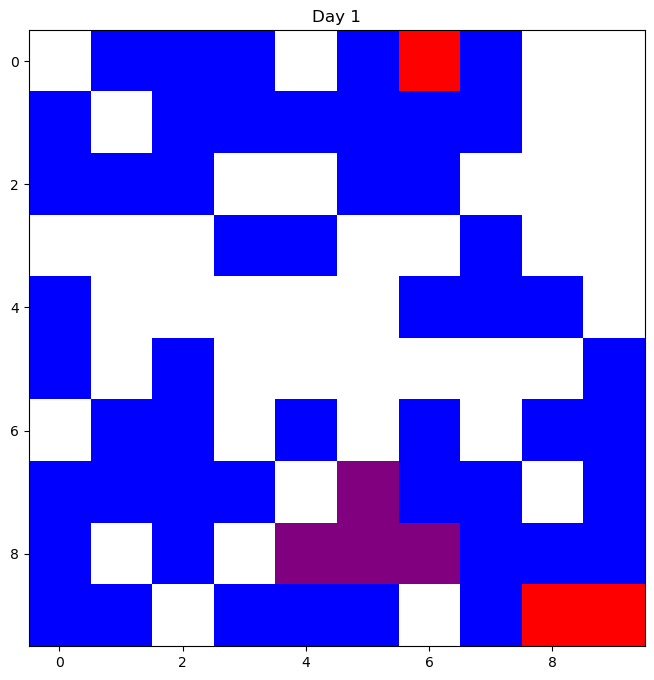

Day 1: Red: 55, Blue: 56


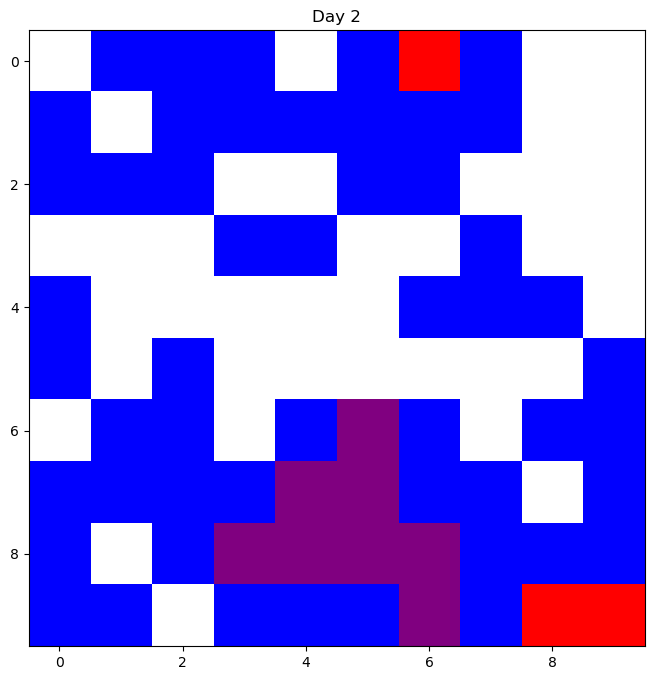

Day 2: Red: 80, Blue: 82


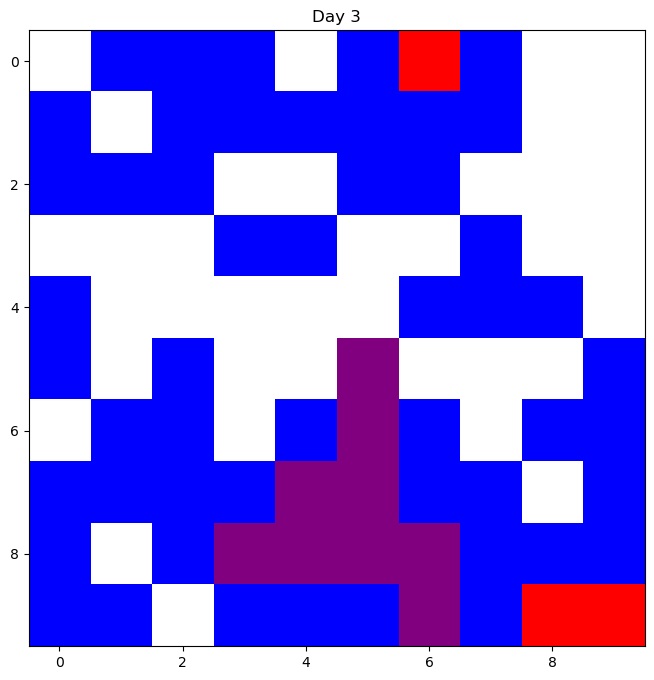

Day 3: Red: 105, Blue: 108


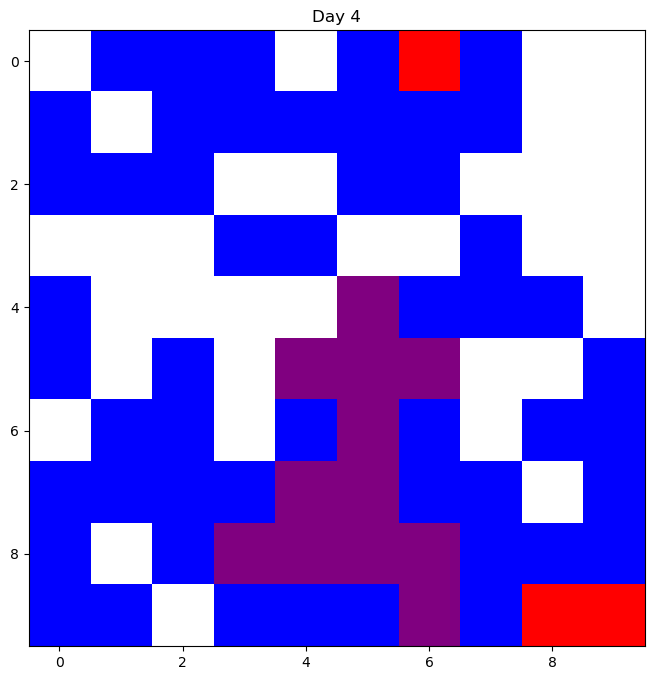

Day 4: Red: 130, Blue: 134


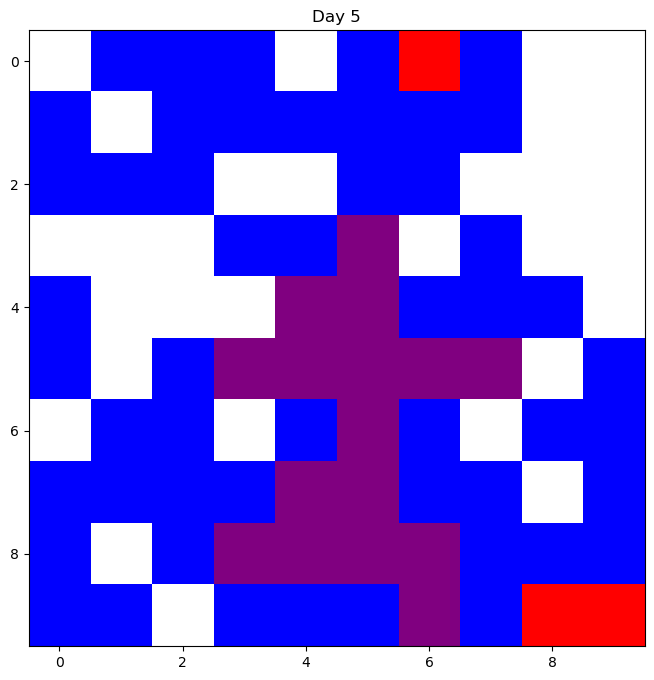

Day 5: Red: 155, Blue: 160


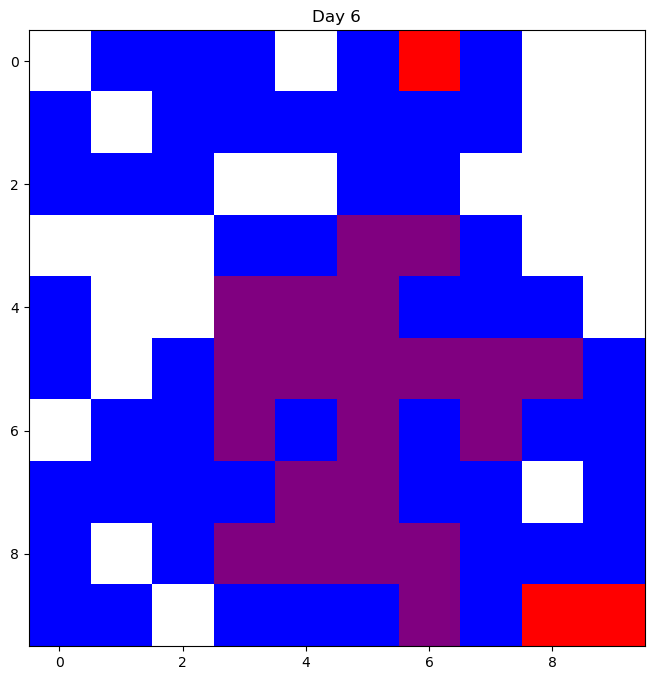

Day 6: Red: 180, Blue: 186


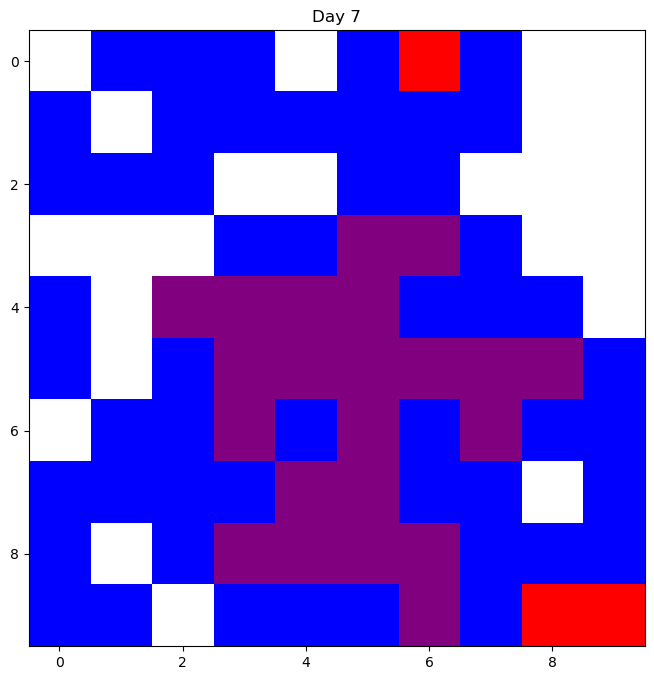

Day 7: Red: 205, Blue: 212


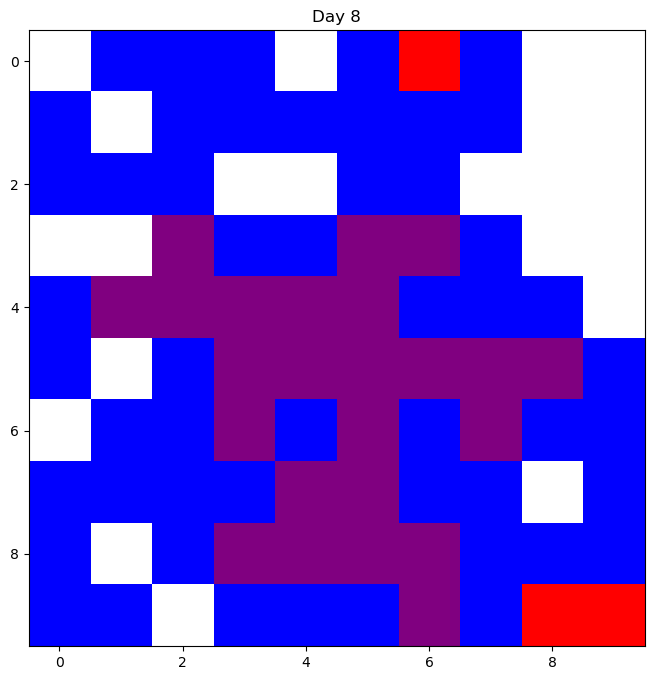

Day 8: Red: 230, Blue: 238


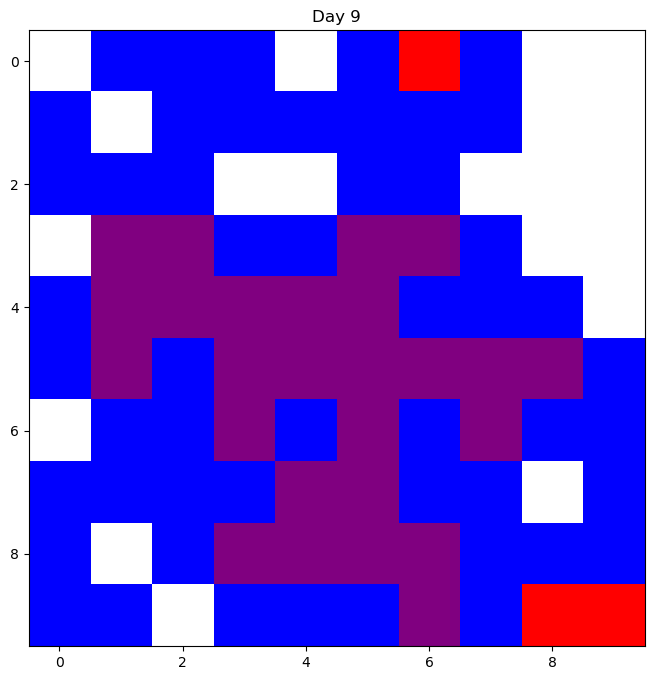

Day 9: Red: 255, Blue: 264


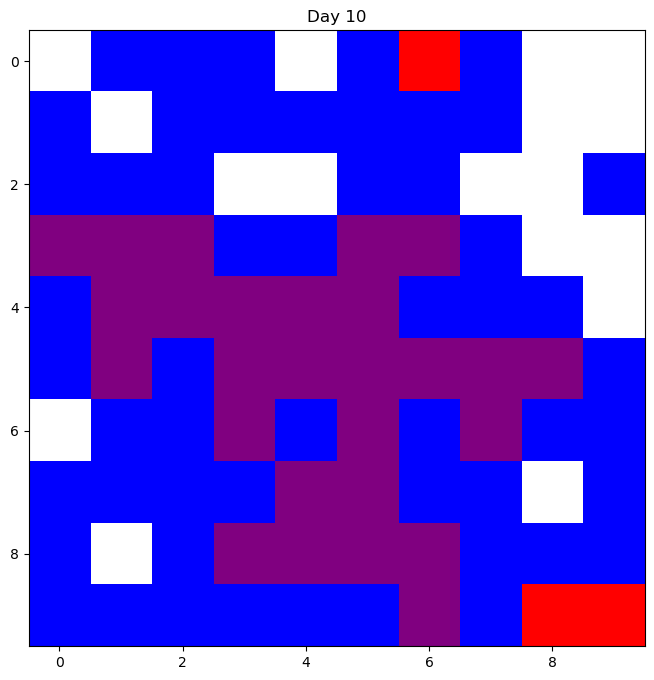

Day 10: Red: 280, Blue: 292


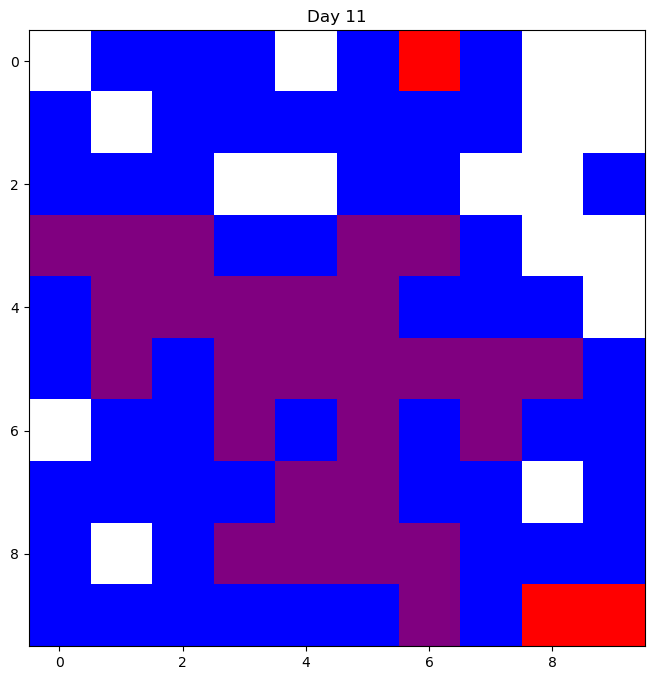

Day 11: Red: 305, Blue: 320


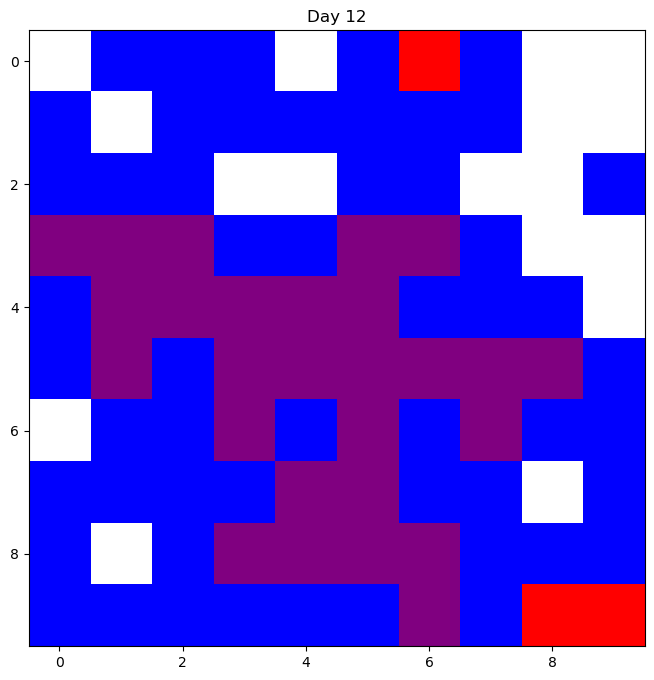

Day 12: Red: 330, Blue: 348


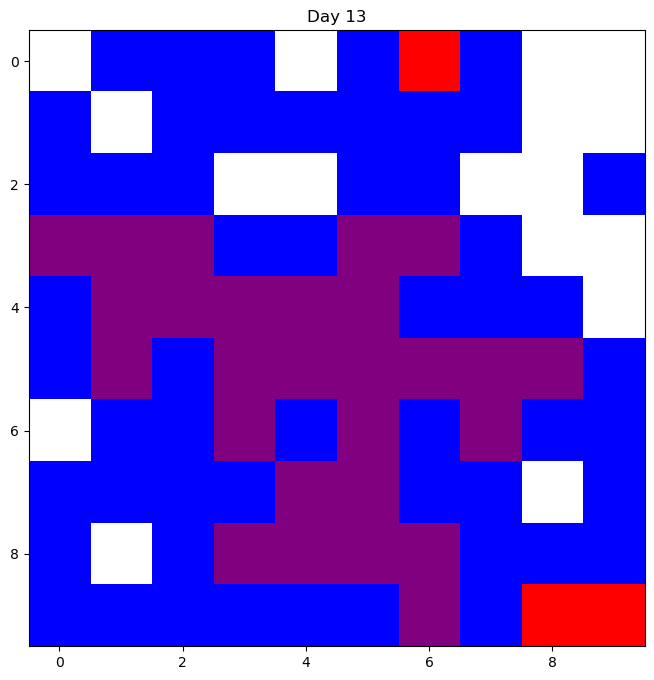

Day 13: Red: 355, Blue: 376


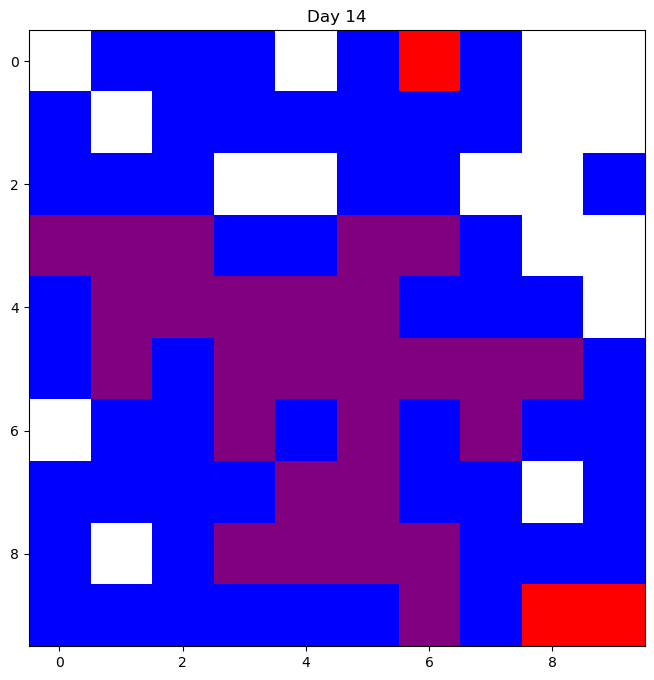

Day 14: Red: 380, Blue: 404


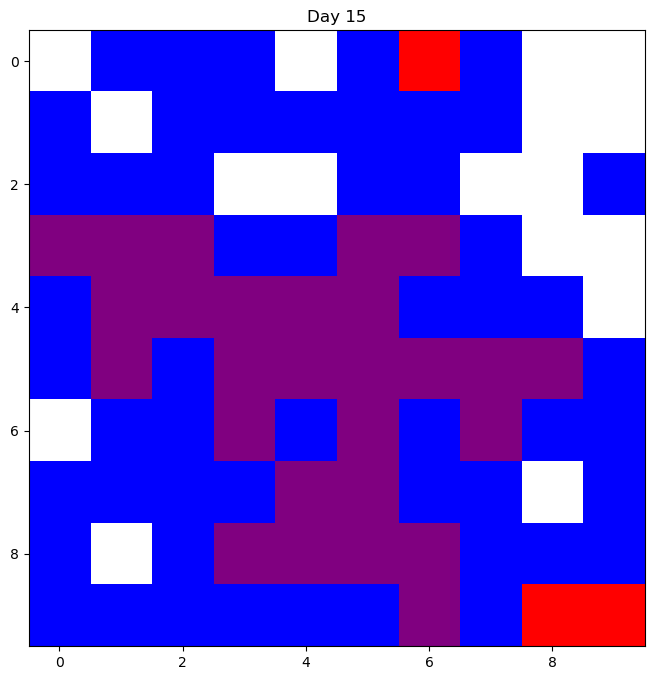

Day 15: Red: 405, Blue: 432


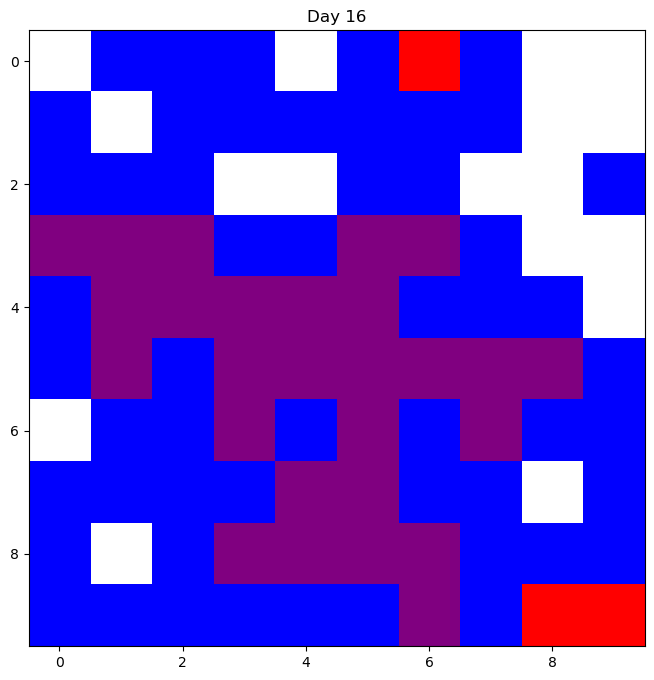

Day 16: Red: 430, Blue: 460


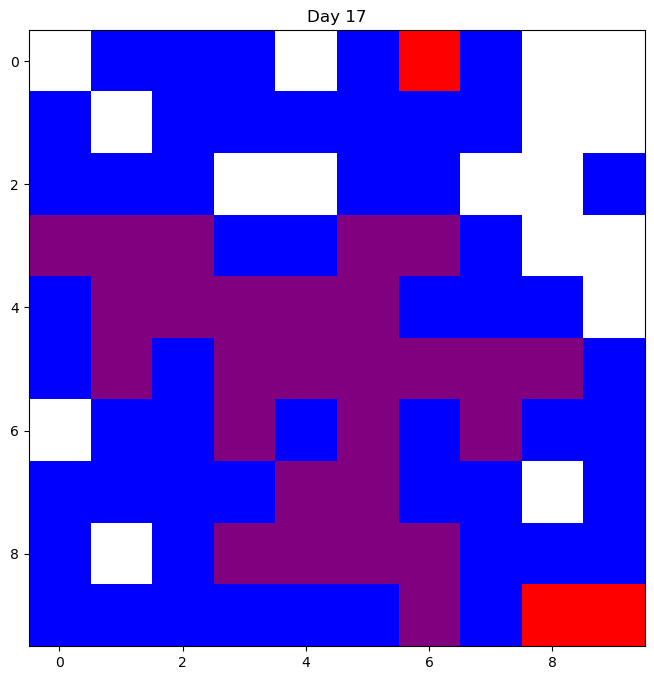

Day 17: Red: 455, Blue: 488


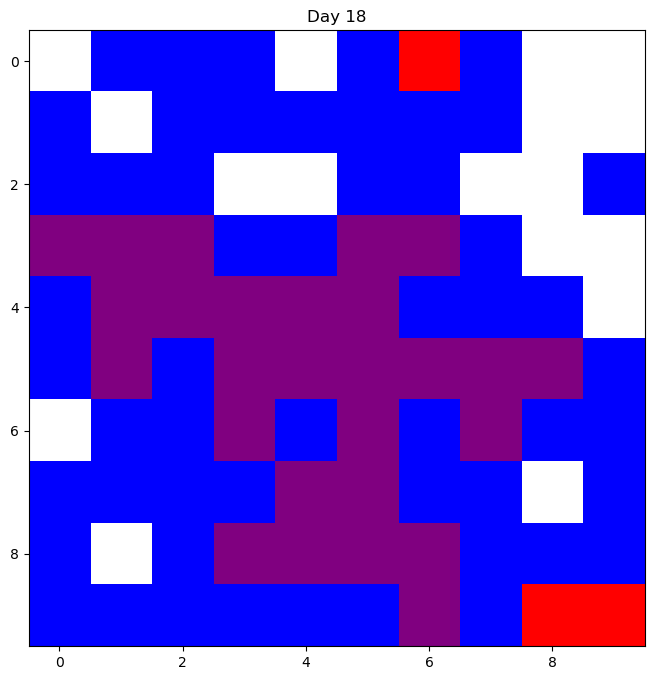

Day 18: Red: 480, Blue: 516


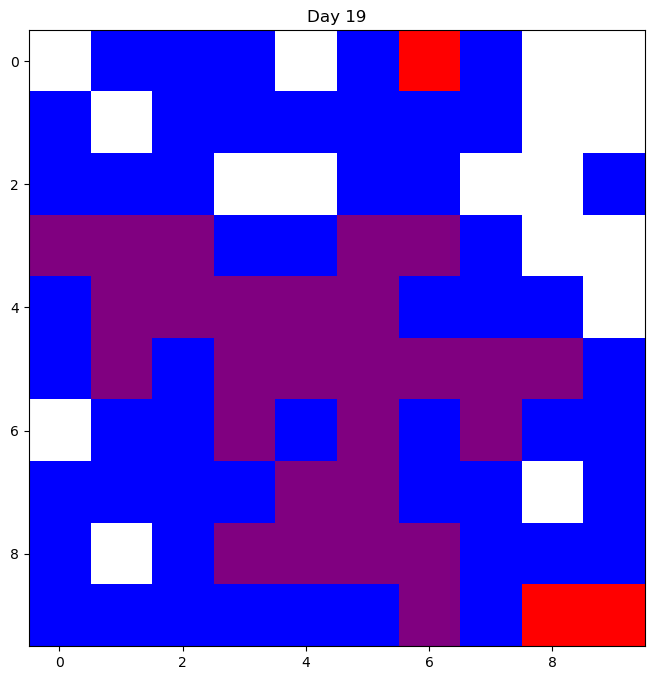

Day 19: Red: 505, Blue: 544


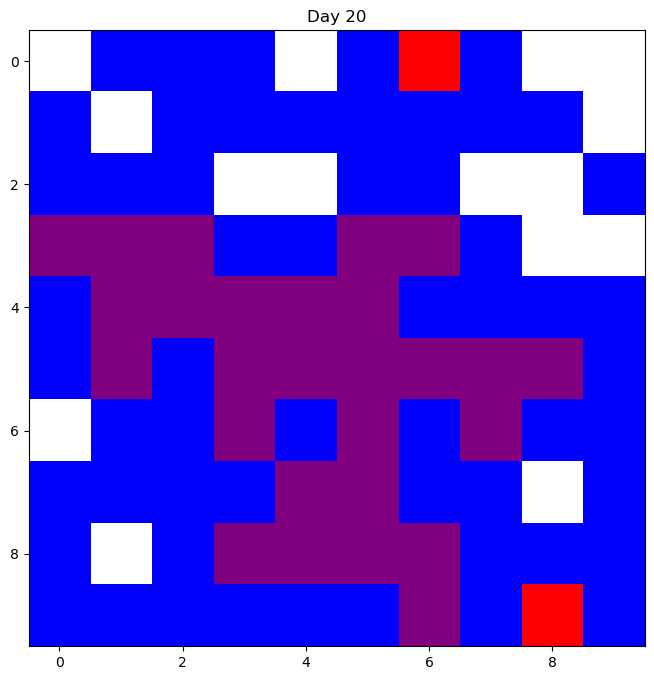

Day 20: Red: 531, Blue: 574


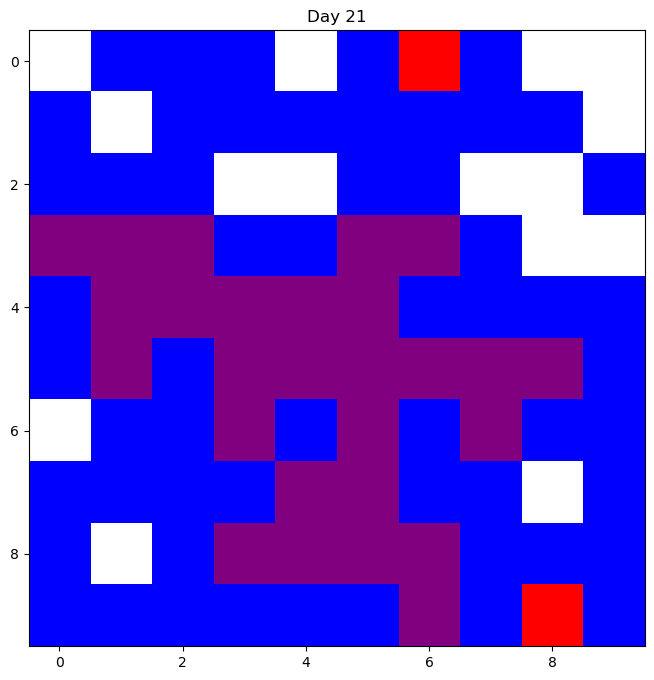

Day 21: Red: 557, Blue: 604


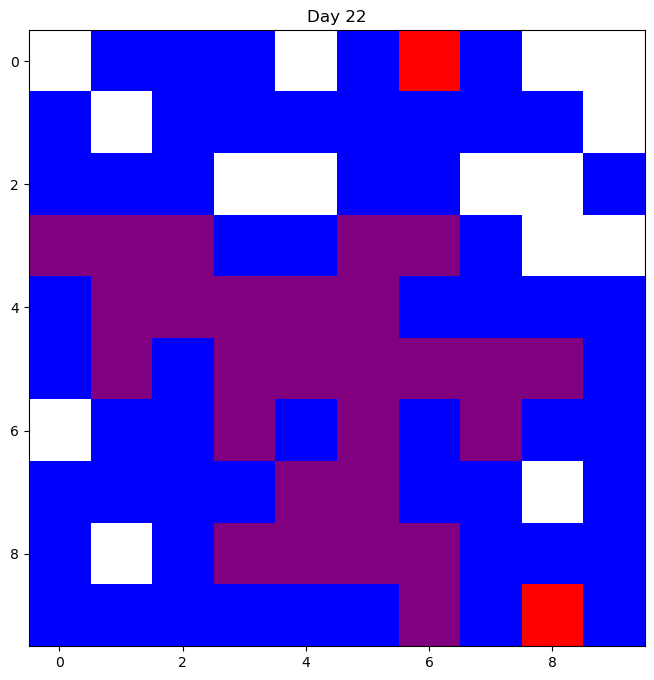

Day 22: Red: 583, Blue: 634


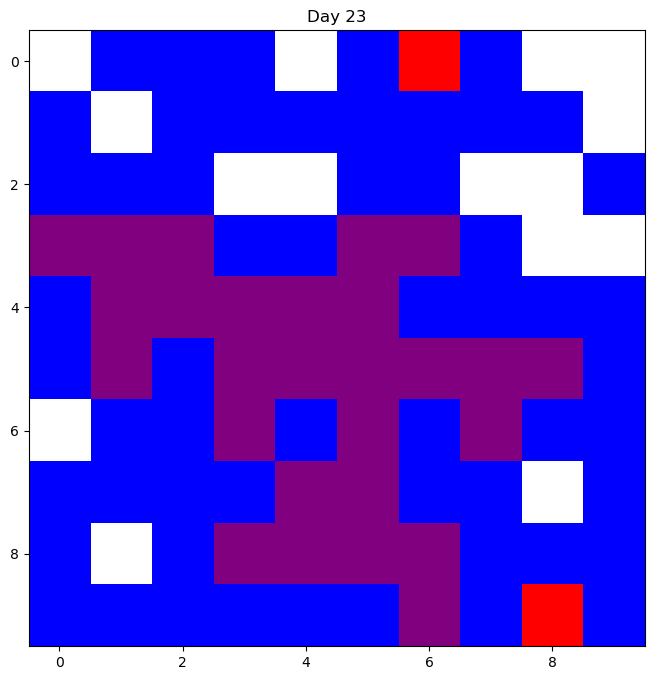

Day 23: Red: 609, Blue: 664


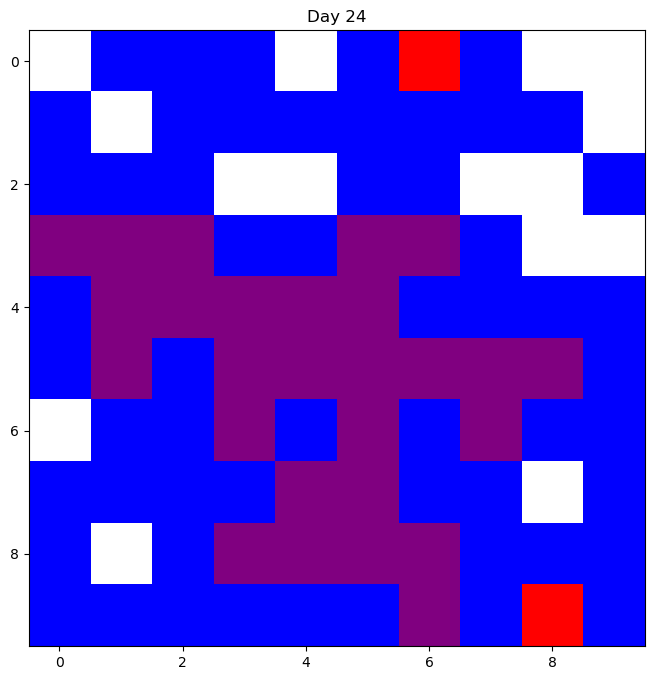

Day 24: Red: 635, Blue: 694


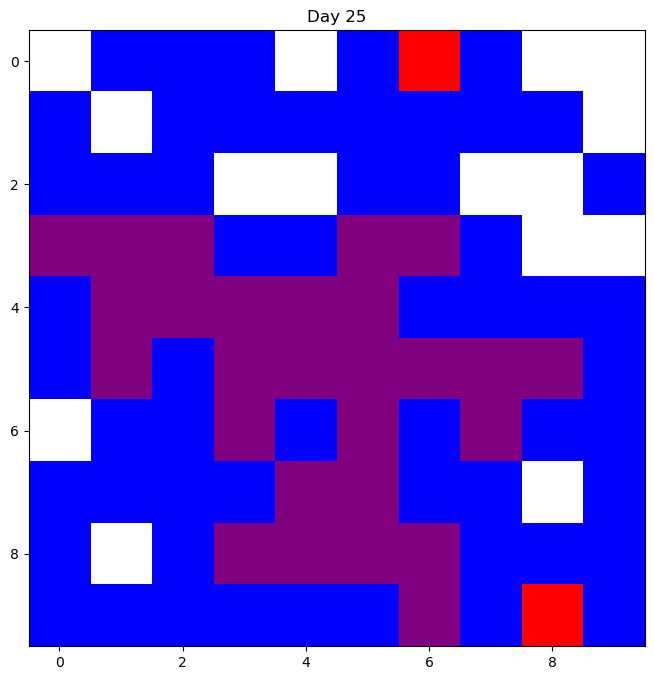

Day 25: Red: 661, Blue: 724


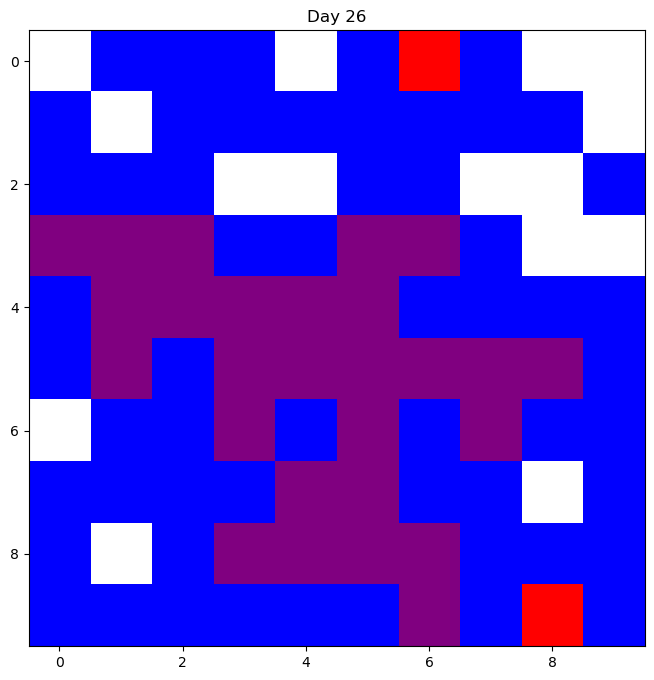

Day 26: Red: 687, Blue: 754


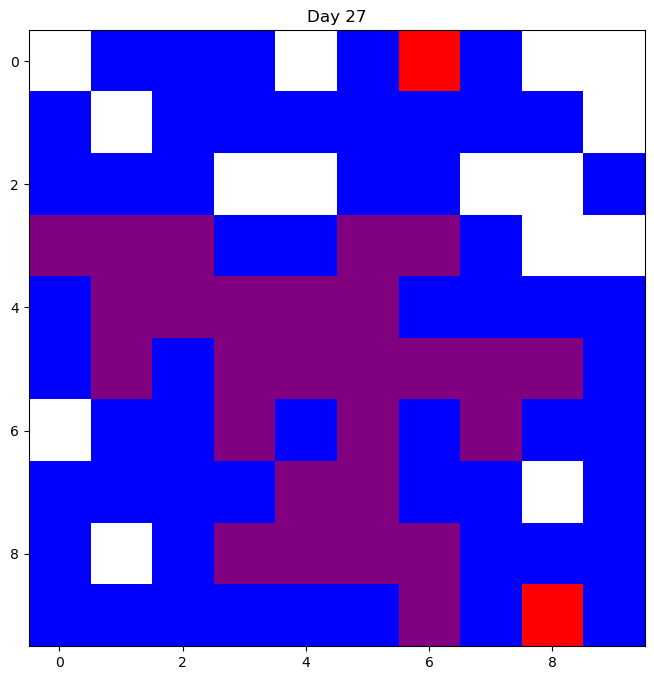

Day 27: Red: 713, Blue: 784


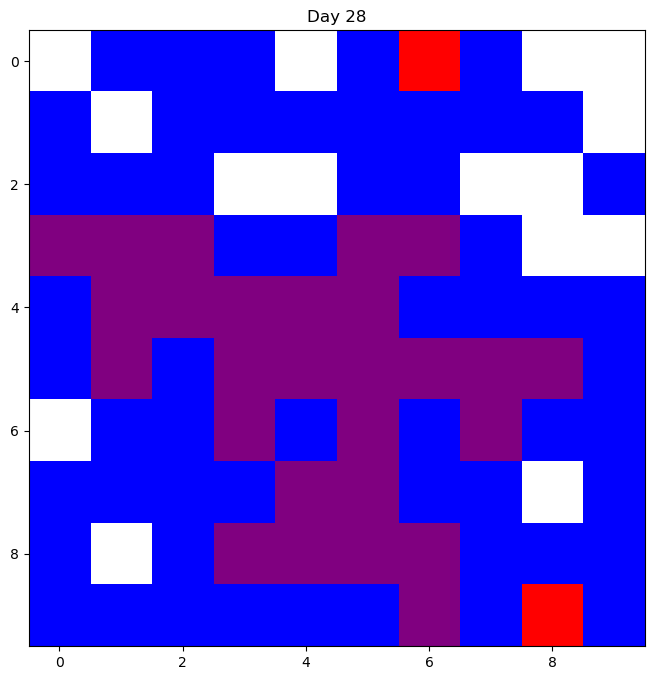

Day 28: Red: 739, Blue: 814


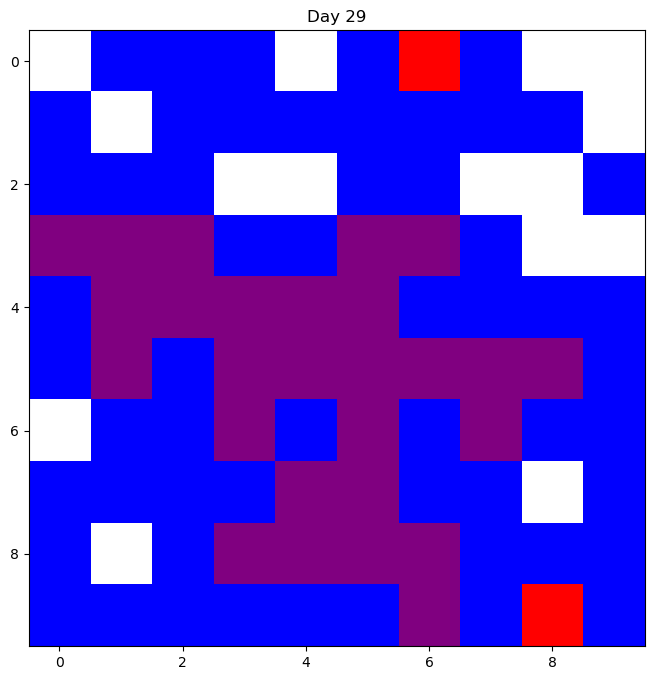

Day 29: Red: 765, Blue: 844


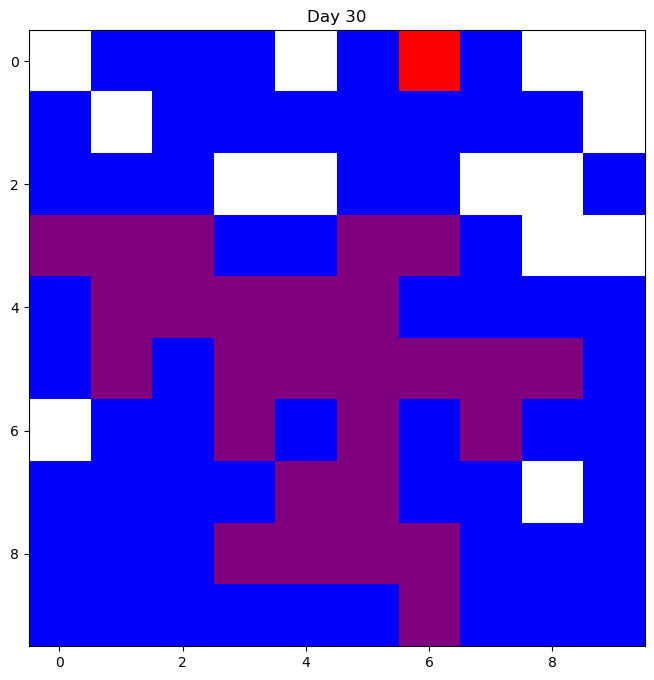

Day 30: Red: 792, Blue: 875


In [22]:
run_simulation(30)

In [11]:
#This version prioritizes assignment to unoccupied spaces over random assignment.
def red_blue_occ(red, blue, food):
    arr = [0]*food
    new_red = red
    new_blue = blue
    while (new_red > 0 or new_blue > 0):
        index = random.randint(0,food-1)
        place = arr[index]
        if (place == 0 or place == 1 or place == 3):
            if random.random() > 0.5:
                if new_red > 0:
                    arr[index] = place + 1
                    new_red = new_red - 1
            else:
                if new_blue > 0:
                    arr[index] = place + 3
                    new_blue = new_blue - 1
    for i in arr:
        if i == 1:
            new_red = new_red + 2
        elif i == 3:
            new_blue = new_blue + 2
        elif i == 4:
            if random.random() > 0.5:
                new_red = new_red + 2
            else:
                new_red = new_red + 1
            if random.random() > 0.5:
                new_blue = new_blue + 1
        elif i == 6:
            new_blue = new_blue + 2
    return new_blue,new_red


In [12]:
def red_blue_random_jour(red,blue,food,jour):
    for i in range(jour):
        a,b=red_blue_random(red,blue,food)
        red=a
        blue=b
    return a,b


In [14]:
def red_blue_occ_jour(red,blue,food,jour):
    for i in range(jour):
        a,b=red_blue_occ(red,blue,food)
        red=a
        blue=b
    return a,b


In [15]:
def visualise_red_blue_random_rate(red,blue,food):
    jours = [1,3,5,7,9,11]
    reds, blues = zip(*[red_blue_random_jour(red,blue,food,jour) for jour in jours])
    plt.plot(jours, reds, color ="red",label="Reds")
    plt.plot(jours, blues, color="blue", label="Blues")
    plt.xlabel("Days")
    plt.ylabel("Values")
    plt.title("Changement du population  ")
    plt.legend()
    plt.show()

In [21]:
visualise_red_blue_random_rate(30,30,53)

In [16]:
def visualise_red_blue_occ_rate(red,blue,food):
    jours = [1,3,5,7,9,11]
    reds, blues = zip(*[red_blue_occ_jour(red,blue,food,jour) for jour in jours])
    plt.plot(jours, reds, color ="red",label="Reds")
    plt.plot(jours, blues, color="blue", label="Blues")
    plt.xlabel("Days")
    plt.ylabel("Values")
    plt.title("Changement du population  ")
    plt.legend()
    plt.show()

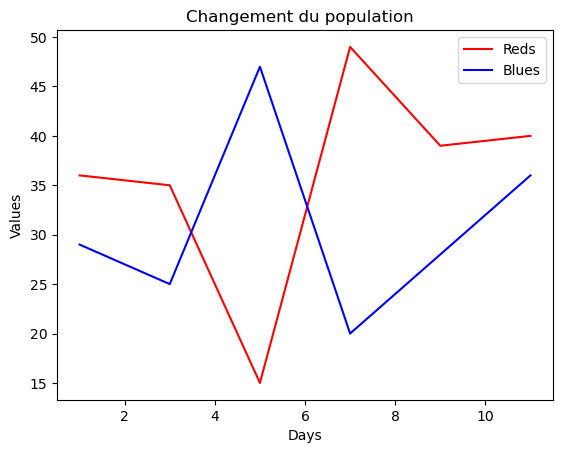

In [19]:
visualise_red_blue_occ_rate(30,30,53)

<IPython.core.display.Javascript object>


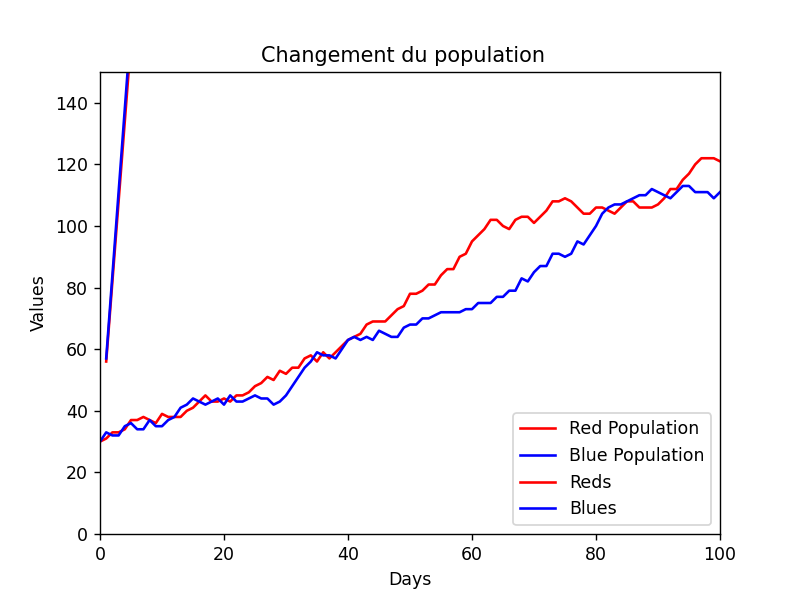

In [20]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Function to simulate population changes with detailed dynamics
def simulate_day(red, blue, food):
    food_per_individual = 10
    resource_limit = food * food_per_individual
    red_carrying_capacity = 100
    blue_carrying_capacity = 100

    total_population = red + blue
    if total_population > resource_limit:
        red_growth = -0.02 * (red / total_population)
        blue_growth = -0.02 * (blue / total_population)
    else:
        red_growth = 0.02 * (1 - total_population / resource_limit)
        blue_growth = 0.02 * (1 - total_population / resource_limit)

    if red > red_carrying_capacity:
        red_growth -= 0.01
    if blue > blue_carrying_capacity:
        blue_growth -= 0.01

    red += int(red * red_growth + np.random.randint(-3, 4))
    blue += int(blue * blue_growth + np.random.randint(-3, 4))

    return max(red, 0), max(blue, 0)

# Initial conditions
initial_red = 30
initial_blue = 30
food = 53
days = 100  # Increased number of days to simulate

# Setting up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, days)
ax.set_ylim(0, 150)  # Increased the upper limit of the y-axis to see population growth more clearly
ax.set_xlabel('Day')
ax.set_ylabel('Population')
line_red, = ax.plot([], [], 'r-', label='Red Population')
line_blue, = ax.plot([], [], 'b-', label='Blue Population')
ax.legend()

# Variables to store the data
reds = [initial_red]
blues = [initial_blue]
days_list = list(range(days + 1))

# Interactive plot updates
for day in range(1, days + 1):
    new_red, new_blue = simulate_day(reds[-1], blues[-1], food)
    reds.append(new_red)
    blues.append(new_blue)

    line_red.set_data(range(day + 1), reds)
    line_blue.set_data(range(day + 1), blues)
    plt.pause(0.1)  # Adjust the pause time as needed for visibility

plt.show()


<IPython.core.display.Javascript object>


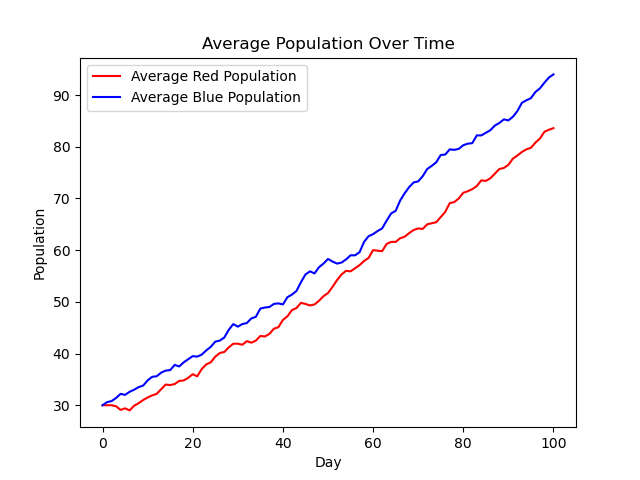

In [31]:
reds_results = []
blues_results = []
for _ in range(10):  # Running 10 simulations
    reds = [initial_red]
    blues = [initial_blue]
    for day in range(1, days + 1):
        new_red, new_blue = simulate_day(reds[-1], blues[-1], food)
        reds.append(new_red)
        blues.append(new_blue)
    reds_results.append(reds)
    blues_results.append(blues)

average_reds = np.mean(reds_results, axis=0)
average_blues = np.mean(blues_results, axis=0)

# Plotting averages
plt.figure()
plt.plot(range(days + 1), average_reds, 'r-', label='Average Red Population')
plt.plot(range(days + 1), average_blues, 'b-', label='Average Blue Population')
plt.xlabel('Day')
plt.ylabel('Population')
plt.title('Average Population Over Time')
plt.legend()
plt.show()